EE 502 P: Analytical Methods for Electrical Engineering
# 8. Probability
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

Topics:
- Examples (coins, dice, waiting, Bolztman)
- Sample spaces
- PDFs and CDFs
- Random Variables
- Expected value, moments, and variances
- Joints and marginals
- Entropy and information
- Divergences and distances
- Markov chains and processes (and linear algebra)
- Markov decision processes

In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

# Code for Figures

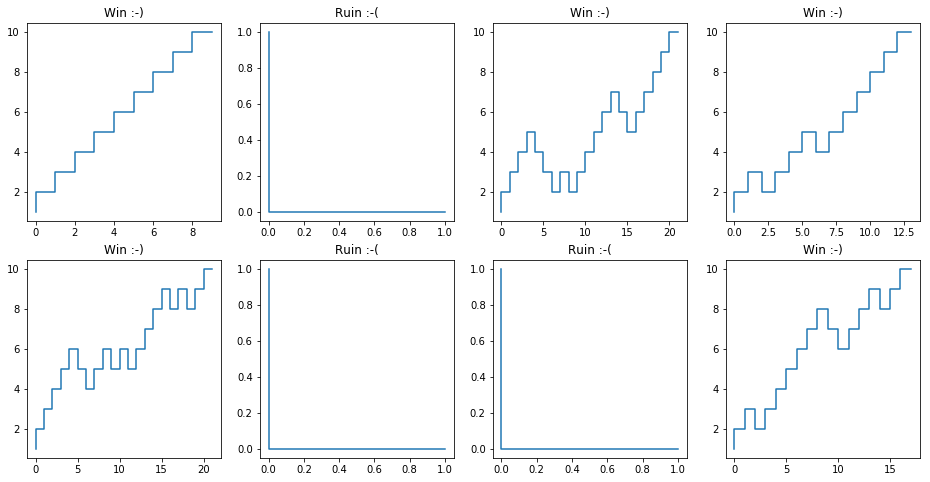

# Basics

## Definitions

**Def:** The **sample space**, $\Omega$, of an experiment is the set of outcomes of the experiment. Subsets of $\Omega$ are called **events**.

**Example:** Consider the roll of two fair dice. The outcomes are the set of pairs in. 

$$
\Omega = \{ 1,2,3,4,5,6 \} \times \{ 1,2,3,4,5,6 \}.
$$

An example event is the set of pairs in which the sum of the dice equals 7:

$$
B = \{ (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) \} .
$$

**Def**: A **probability distribution** is a function $P : \mathcal{P}(\Omega) \rightarrow [0,1]$ such that

a) $P[A] \geq 0$

b) $P[\Omega] = 1$

c) $P[A \cup B] = P[A] + P[B]$ whenever $A \cap B = \emptyset$. 

**Example:** The assignment $P[A] = \frac{1}{36}|A|$ is a probability distribution for the dice example above. Property (a) is satisfied because the absolute value is positive. Property (b) is satisfied because there are 36 elements in $\Omega$. Property (c) is satisfied because if $A$ and $B$ are disjoint sets then $|A+B| = |A| + |B|$. 

**Example:** The probability of the event $B$ above (the dice sum to seven) is $P[B] = \frac{6}{36} = \frac{1}{6}$. 

**Other Properties:**

d) $P[\emptyset] = 0$. This is because $P[\Omega \cup \emptyset] = P[\Omega] + P[\emptyset] = 1$ by property (c). Since, by property (b), $P[\Omega] = 1$, it must be the case that $P[\emptyset] = 0$. 

e) $P[A \cap \overline B] = P[A] - P[A \cap B]$. This is because $A \cap B$ and $A \cap \overline{B}$ are disjoint. 

f) $P[A] = 1 - P[\overline{A}]$. Take $A = \Omega$ in (e). 

g) $P[A \cup B] = P[A] + P[B] - P[A \cap B]$ when $A \cap B \neq \emptyset$. This can be shown using (e) along with the fact that $A \cup B$ is equal to 

$$
(A \cap \overline B) \cup (A \cap B) \cup (\overline{A} \cap B).
$$

## Conditional Probability

**Def:** The **probability of $B$ given $A$** is 

$$
P[B\;|\;A] = \frac{P[A\cap B]}{P[A]}. 
$$

It is the probability of the event $B$ given that $A$ has occurred.

**Example:** With our running example of two dice being thrown, suppose that $A$ is the event that the face shown by the first die is even and $B$ is the event that the sum of the two dice is 7. Then

$$
P[A \cap B] = P[ \{ (2,5), (4,3), (6,1) \} ] = \frac{3}{36} = \frac{1}{12}
$$

and

$$
P[A] = P[\{ 2,4,6 \} \times \{ 1,2,3,4,5,6 \}]  = \frac{18}{36} = \frac{1}{2}.
$$

Thus, 

$$
P[B\;|\;A] = \frac{\frac{1}{12}}{\frac{1}{2}} = \frac{1}{6}.
$$

That is, given that the first die comes up even, there is (still) a one in six chance that the sum of the two dice turns out to be seven.

**Example:** The probability that the sum is equal to $a$ given that it is equal to $b$ is 1 if $a=b$ and 0 otherwise.

**Property:** Suppose that $A_1$, .., $A_n$ are $n$ mutually exclusive events whose union is $\Omega$. Then

$$
P[B] = P[B\;|\;A_1] + \dots  + P[B\;|\;A_n] .
$$

**Example:** Suppose $A_i = \{i\} \times \{1,2,3,4,5,6\}$ for $i = 1$ to $6$. Then if $B$ is the probability of getting a seven, we have

\begin{eqnarray}
P[B] & = & P[B\;|\;A_n] + \dots + P[B\;|\;A_n] \\
     & = & \frac{1}{36} + \dots + \frac{1}{36} \\
     & = & \frac{1}{6}.
\end{eqnarray}

##  Independence

**Def:** Two events $A$ and $B$ are **independent** if $P[A \cap B] = P[A]P[B]$. 

**Property:** If $A$ and $B$ are independent, then $P[B \;|\; A] = P[B]$.

## Bayes Theorem

**Theorem:** Let $A$ and $B$ be events. Then
    
$$
P[A \;|\; B] = \frac{P[B\;|\;A]P[A]}{P[B]}.
$$

**Example:** (Stark and Woods p. 21) Suppose there is a test for cancer with the following properties

- $A$ = the event that the test says the person has cancer
- $B$ = the event that the person actually has cancer

Suppose that 

- $P[A \;|\; B] = 0.95$: Test returns true if patient has cancer.
- $P[\overline{A} \;|\; \overline{B}] = 0.95$ Test returns false if patient does not have cancer.
- $P[B] = 0.005$.

Is this a good test?

To answer this question, we look at the probability that the person has cancer given the test comes up positive. That is,

\begin{eqnarray}
P[B \;|\; A] & = & \frac{P[A\;|\;B]P[B]}{P[A]} \\
             & = & \frac{P[A\;|\;B]P[B]}{P[A\;|\;B]P[B] + P[A\;|\;\overline{B}]P[\overline{B}]}
\end{eqnarray}

where we have expanded $P[A]$ using the conditional probability property above. To compute $P[A \;|\; \overline{B}]$ note that

$$
P[\overline{A} \;|\; \overline{B}] = 
\frac{P[\overline{A} \cap \overline{B}]}{P[\overline{B}]} = \frac{P[\overline{B}] - P[A \cap \overline{B}]}{P[\overline{B}]} = 1 - P[A\;|\;\overline{B}]
$$

using property (e). Thus, 

\begin{eqnarray}
P[B \;|\; A] & = & \frac{0.95 \cdot 0.005}{0.95 \cdot 0.005 + 0.05 \cdot 0.995 } \\
             & = & 0.087.
\end{eqnarray}

The probability the patient has cancer given that the test was positive is only 8.7%, so this is not a very good test.

## Random Variables

**Def:** A **random variable** $X$ is a function $X : \Omega \rightarrow \mathbb{R}$ such that 

i) Given a measureable set $B \subseteq \mathbb{R}$, the set

$$\{ \omega \in \Omega \;|\; X(\omega) \in B \}$$

is an event (this is trivially satisfied if $\Omega$ is a discrete set).

ii) $\lim_{x \rightarrow \infty}P[X=x] = \lim_{x \rightarrow -\infty}P[X=x] = 0$. 

This is a tricky definition and usually we don't worry about its details. Examples clarify.

**Example:** Consider the two dice example and define $X$ to be the sum of the two dice. Then we find probabilities such as

$$P[X = 7] = P[\omega \in \Omega \;|\; X(\omega) = 7] = 1/6.$$

Similarly, 

$$
P[X=2] = 1/36
$$

and

$$
P[X=13] = 0. 
$$

## Cumulative Density Function

**Def:** Given a random variable $X$, the **cumulative density function** (CDF) for $X$ is
    
$$
F_X(x) = P[X \leq x].
$$

**Example:** If $X$ is the sum of the two dice, the CDF determined by summing up the probabilities of getting a sum less than or equal to $x$, since all such events are disjoint. Thus, the CDF is as follows:

\begin{eqnarray}
F_X(x) & = & 0 \; \mathrm{for} \; x \leq 1 \\
F_X(2) & = & 1/36 \\
F_X(3) & = & 3/36 \\
F_X(4) & = & 6/36 \\
F_X(5) & = & 10/36 \\
F_X(6) & = & 15/36 \\
F_X(7) & = & 21/36 \\
F_X(8) & = & 26/36 \\
F_X(9) & = & 30/36 \\
F_X(10) & = & 33/36 \\
F_X(11) & = & 35/36 \\
F_X(12) & = & 36/36 \\
F_X(x) & = & 36/36 \; \mathrm{for} \; x \leq 0 .
\end{eqnarray}

## The Probability density function

**Def:** If $\Omega$ is discrete, then the **probability density function** (PDF) of a random variable $X$ is

$$
f_X(x) = P[\{ \omega \;|\; X(\omega) = x\}].
$$

**Example:** For the dice example where $X$ is the sum of the two dice,

\begin{eqnarray}
f_X(x) & = & 0 \; \mathrm{for} \; x \leq 0 \\
f_X(2) & = & 1/36 \\
f_X(3) & = & 2/36 \\
f_X(4) & = & 3/36 \\
f_X(5) & = & 4/36 \\
f_X(6) & = & 5/36 \\
f_X(7) & = & 6/36 \\
f_X(8) & = & 5/36 \\
f_X(9) & = & 4/36 \\
f_X(10) & = & 3/36 \\
f_X(11) & = & 2/36 \\
f_X(12) & = & 1/36 \\
f_X(x) & = & 0/36 \; \mathrm{for} \; x \leq 0 .
\end{eqnarray}

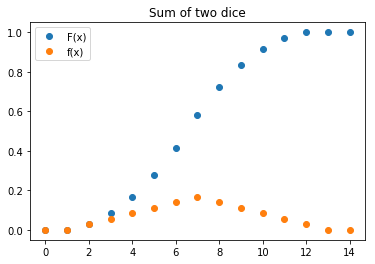

In [170]:
x = np.linspace(0,14,15);
CDF = np.array([0,0,1,3,6,10,15,21,26,30,33,35,36,36,36]) / 36;
PDF = np.array([0,0,1,2,3,4,5,6,5,4,3,2,1,0,0]) / 36;
plt.plot(x,CDF, "o", label="F(x)")
plt.plot(x,PDF, "o", label="f(x)")
plt.legend();
plt.title("Sum of two dice");

**Properties of the CDF:**

a) $F(\infty) = 1$ and $F(-\infty) = 0$. 

b) $x \leq y$ implies that $F(x) \leq F(x)$. Thus, $F$ is a non-decreasing function.

**Properties of the PDF:**

a) $\int_{-\infty}^\infty f_X(x) dx = 1$

b) $F_X(x) = \sum f_X(x)$, assuming $x$ takes on discrete values. 

**Def:** If $F_X$ is continuous and differentiable, then 

$$
f_X(x) = \frac{d}{dx}F_X(x) 
$$

and the above sum in (b) should be an integral. 

**Example:** Suppose that $T$ represents the waiting time for the radioactive decay of an atom. This can be modeled by an exponential distribution with parameter $\lambda$ with

$$
f_T(t) = \lambda e^{-\lambda t}
$$

when $t \geq 0$ and $0$ otherwise.

It can be checked that $f$ integrates to 1 over $[0,\infty)$ and the CDF is defined by

$$
F_X(t) = \int_0^\infty \lambda e^{-\lambda t} dt = 1 - e^{-\lambda t}. 
$$

**Note:** If $X$ is more than one dimensional, then the above definitions must be extended to $F(x_1, x_2, ... x_n)$. We will not cover that in these notes. The extension is straightforward, but requires a fair amount of book keeping.

## Functions of random variables

If $X$ is a random variable, we can make other random variables from $X$ such as $Y = X^2$ or $Z = 1/(1+X)$. Each of these new random variables also has a CDF and PDF. 

**Example:** Let $Y = X^2$ in the dice example. Then $Y$ is the square of the sum of the two dice. It has values $4$, $9$, $16$, $25$, $36$, and so on. For example, the probability that $Z$ is $36$ is the same as the probability that $X$ is $6$ which is $10/36$. 

**Example:** If $Y = T^2$ and the PDF of $T$ is exponentially distributed, then

\begin{eqnarray}
F_U(u) & = & P[U \leq u] = P[T^2 < u] \\
       & = & P[-\sqrt{u} \leq T \leq \sqrt{u}] \\
       & = & P[T \leq \sqrt{u}] \\
       & = & F_T(\sqrt{u}) \\
       & = & 1 - e^{-\lambda \sqrt{u}}. 
\end{eqnarray}

The third equality above is due to the fact that the probability $T$ is negative is $0$ for this particular distribution. 

To compute the PDF, we have

\begin{eqnarray}
f_U(u) & = & \frac{d}{dt} \left (1 - e^{-\lambda \sqrt{u}} \right ) \\
       & = & \frac{1}{2 \sqrt{u}} \lambda e^{-\lambda \sqrt{u}} .
\end{eqnarray}

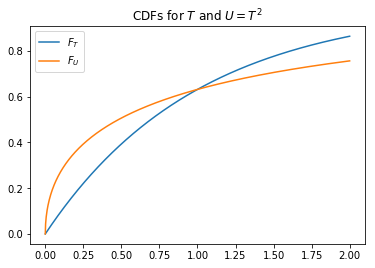

In [173]:
t = np.linspace(0,2,1000)
u = np.linspace(0,2,1000)
l = 1
plt.plot(t,1-np.exp(-l*t), label="$F_T$")
plt.plot(t,1-np.exp(-l*np.sqrt(u)), label="$F_U$")
plt.title("CDFs for $T$ and $U = T^2$")
plt.legend();

## Moments, means, and variances

**Def:** For a discrete system, the **expected value** of a random variable $X$ is 

$$
E[X] = \sum_x x \;f_X(x).
$$

For a real valued system, the **expected value** of a random variable $X$, also called the **mean** $\mu$ of $X$, is 

$$
\mu = E[X] = \int_{\infty}^\infty x \;f_X(x) dx.
$$

If $Y = g(X)$ is a function of the random variable $X$, then we can compute its expected value as well.

$$
E[Y] = E[g(X)] \int_{-\infty}^\infty y \;f_Y(x) dy. 
$$

It turns out that to compute $E[Y]$ you don't need $f_Y$. You can use:

$$
E[Y] = \int_{-\infty}^\infty g(x) \;f_X(x) dx . 
$$

**Example:** With the dice example and $X$ representing the sum of the two dice, we have

$$
E[X] = 2\cdot\frac{1}{36}
     + 3\cdot\frac{2}{36}
     + 4\cdot\frac{3}{36}
     + 5\cdot\frac{4}{36}
     + 6\cdot\frac{5}{36}
     + 7\cdot\frac{6}{36}
     + 8\cdot\frac{5}{36}
     + 9\cdot\frac{4}{36}
     + 10\cdot\frac{3}{36}
     + 11\cdot\frac{2}{36}     
     + 12\cdot\frac{1}{36} = 7.
$$

The expected value of the sum of the square is 

$$
E[X^2] = 2^2\cdot\frac{1}{36}
     + 3^2\cdot\frac{2}{36}
     + 4^2\cdot\frac{3}{36}
     + 5^2\cdot\frac{4}{36}
     + 6^2\cdot\frac{5}{36}
     + 7^2\cdot\frac{6}{36}
     + 8^2\cdot\frac{5}{36}
     + 9^2\cdot\frac{4}{36}
     + 10^2\cdot\frac{3}{36}
     + 11^2\cdot\frac{2}{36}     
     + 12^2\cdot\frac{1}{36} = 54.83.
$$

**Example:** The expected value of the exponential distribution is

$$
E[T] = \int_0^\infty t \lambda e^{-\lambda t} dt = \frac{1}{\lambda}. 
$$

Furthermore,

$$
E[T^2] = \int_0^\infty t \lambda e^{-\lambda t} dt = \frac{1}{\lambda} = \frac{2}{\lambda^2}. 
$$

**Def:** The **nth moment** of $X$ is $E[X^n]$. The **nth** central moment of $X$ is $E[(X-\mu)^n]$. The second central moment is also called the **variance** of $X$ and is denoted $\sigma^2$. The **standard deviation** of $X$ is $\sigma$. 

**Property:** 

$$
\sigma^2 = E[(X-\mu)^2] = E[X^2] - E[2\mu X] + E[\mu^2].
$$

Since $E[2\mu X] = 2\mu E[X] = 2 \mu^2$ we get

$$
\sigma^2 = E[(X-\mu)^2] = E[X^2] - \mu^2.
$$

**Example:** The variance of $X$ in the dice problem is $\sigma^2 = 54.83 - 49 = 5.83$. 

**Example:** The variance of the exponentially distributed $T$ is $\frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}$. The standard deviation is then $1 / \lambda$. 

In [168]:
l, t = sm.symbols("lambda,t")
sm.integrate(t * l * sm.exp(-l*t), (t,0,sm.oo)), sm.integrate(t**2 * l * sm.exp(-l*t), (t,0,sm.oo))

⎛⎧      1                                         π  ⎧      2                 
⎜⎪      ─         for │periodic_argument(λ, ∞)│ < ─  ⎪      ──         for │pe
⎜⎪      λ                                         2  ⎪       2                
⎜⎪                                                   ⎪      λ                 
⎜⎪∞                                                  ⎪                        
⎜⎨⌠                                                , ⎨∞                       
⎜⎪⎮      -λ⋅t                                        ⎪⌠                       
⎜⎪⎮ λ⋅t⋅ℯ     dt              otherwise              ⎪⎮    2  -λ⋅t            
⎜⎪⌡                                                  ⎪⎮ λ⋅t ⋅ℯ     dt         
⎜⎪0                                                  ⎪⌡                       
⎝⎩                                                   ⎩0                       

                         π⎞
riodic_argument(λ, ∞)│ < ─⎟
                         2⎟
                          ⎟
                  

# Discrete Time, Discrete State Markov Processes

- The Markov property
  - Is: Gambler's ruin
  - Is not: drawing coins from a jar
    - Although can be recast as

- Definition: Directed Graph with prob assignment $p_{ij}$
- $X_{k+1}$ given $X_k$ $P[X_{k+1} = j \;|\; X_k = i] = p_{ij}$
- Sampling random trajectories and computing the probability of a trajectory
- Probability vector and matrix update
- Update equation
- Irreducibility and rank
- Periodicity
- Absorbing states
- Recurrence time
- Ergodicity
- Steady state

- Moments 

$$E[X_{k+1}] = \sum_x x \cdot P[X_{k+1} = x]$$

\begin{eqnarray}
\mu_{k+1} & = &  \mathbb{1} p_{k+1}  \\
          & = & \mathbb{1} ( P \cdot p_k ) \\
\end{eqnarray}

## Example: Gambler's Ruin

Suppose a gambler initially has one dollar. She places a bet against the house that she wins with probability $p$ and loses with probability $1-p$. If she wins, she gets another dollar, otherwise she looses the dollar. She continues this process until she either runs out of money or gets to the house limit of $N$ dollars. For example, if $N=5$, we get the following system:

$$
  1 
  \hookrightarrow 0
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 1 
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 2
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 3 
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 4
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 5
  \hookleftarrow
  1
$$

**States:**

- Absorbing: $0$ and $N$
- Transient States: $1$ through $N-1$
- Reducibile: No. 
- Communication Classes: $\{0\}$, $\{1,...,N-1\}$, $\{N\}$
- Periodicity: $1$ and $N$ have period $1$. All other states have period $2$. 
- Ergodic States: $0$ and $N$ are ergodic. 

**Trajectories:**

Once the state becomes $0$ or $5$, the system stays there.

**Probability Matrix:**

The probability matrix $P \in \mathbb{R}^{(N-1) \times (N-1)}$ with, for example, if $N = 5$, is given by 

$$
P = 
\begin{pmatrix}
1   & 1-p   & 0   & 0   & 0   & 0     \\
0   & 0   & 1-p   & 0   & 0   & 0     \\
0   & p   & 0     & 1-p & 0   & 0     \\
0   & 0   & p     & 0   & 1-p & 0     \\
0   & 0   & 0     & p   & 0   & 0     \\
0   &  0  & 0     & 0   & p   & 1   
\end{pmatrix}
$$

**Steady State Behavior:**

With this system, the equation

$$
P x = x
$$

has two solutions, meaning that $1$ is an eigenvalue with multiplicity 2. The eigenvectors associated with these two solutions are 

$$
u = \begin{pmatrix}
1 \\
\vdots \\
0
\end{pmatrix} \; \mathrm{and} \;
v = \begin{pmatrix}
0 \\
\vdots \\
1
\end{pmatrix} .
$$

Any combination of these two vectors is a steady state solution. If we would like to know what the probability of winning $N$ dollars, however, this analysis will not tell us. This is because the steady state depends on how much money the gambler starts with. If she starts with $N$ dollars, then the probability is $1$. If she starts with $N-1$ dollars, it is more complicated. 

To determine the steady state starting with $1$ dollar, we can argue as follows.

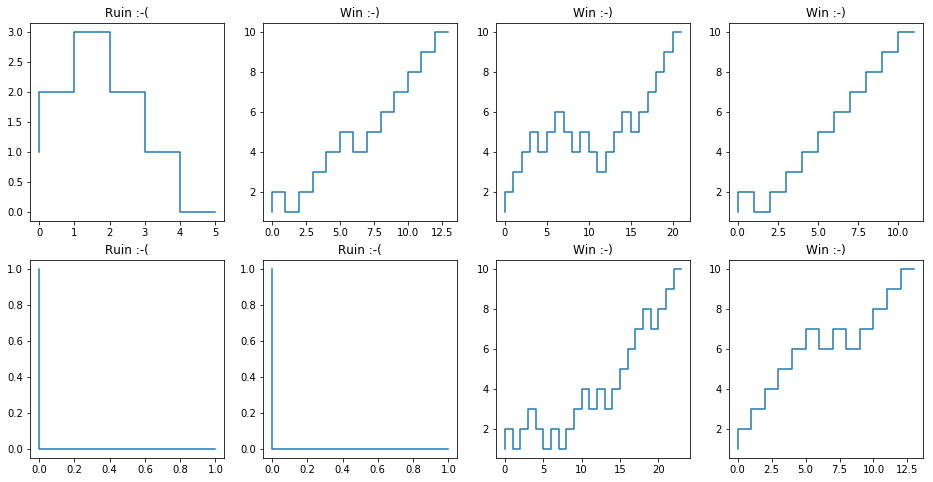

In [118]:
#
# Gambler's Ruin Simulation
#

def gamble(p,n):
    x = 1
    trajectory = [x]
    while x != 0 and x != n:
        if random.random() < p:
            x += 1
        else:
            x -= 1
        trajectory.append(x)
    return trajectory

p = 0.75
n = 10
gamble_trajectories,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(8):
    x = gamble(p,n)
    t =range(len(x))
    a = ax[int(i/4)][i%4]
    a.step(t,x)
    if x[-1] == n:
        a.set_title("Win :-)")
    else:
        a.set_title("Ruin :-(")

(matrix([[0.65738116],
         [0.001121  ],
         [0.        ],
         [0.00440034],
         [0.        ],
         [0.00815309],
         [0.        ],
         [0.00988718],
         [0.        ],
         [0.00566244],
         [0.31339479]]), 0.3392158552348125)

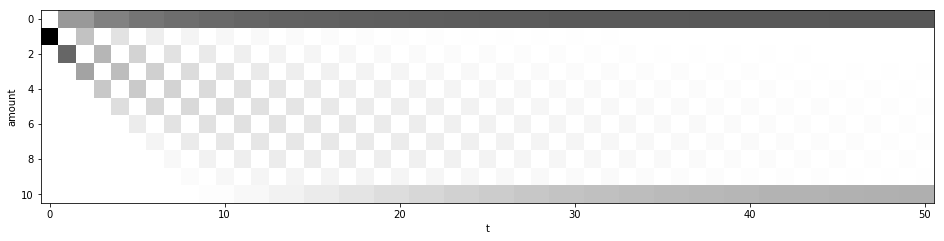

In [113]:
n = 10
prob = 0.6

P = np.zeros((n+1,n+1))
P[0,0] = 1
P[n,n] = 1
for i in range(n-1):
    P[i+2,i+1] = prob
    P[i,i+1] = 1-prob

p = np.zeros(n+1)
p[1] = 1

trajectory = [p]
for t in range(50):
    p = P.dot(p)
    trajectory.append(p)

trajectory = np.matrix(trajectory).transpose()
    
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(trajectory,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel("amount");

q = (1-prob)/prob
trajectory[:,-1], (1-q) / (1-q**n)

In [114]:
p = sm.symbols("p")
P = sm.Matrix([
    [1, 1-p, 0,   0,   0],
    [0, 0,   1-p, 0,   0],
    [0, p,   0,   1-p, 0],
    [0, 0,   p,   0,   0],
    [0, 0,   0,   p,   1]
])
P*P*P

⎡             2                    2               3      ⎤
⎢1  p⋅(-p + 1)  - p + 1    (-p + 1)        (-p + 1)      0⎥
⎢                                                         ⎥
⎢                                    2                    ⎥
⎢0           0           2⋅p⋅(-p + 1)          0         0⎥
⎢                                                         ⎥
⎢         2                                          2    ⎥
⎢0     2⋅p ⋅(-p + 1)           0         2⋅p⋅(-p + 1)    0⎥
⎢                                                         ⎥
⎢                           2                             ⎥
⎢0           0           2⋅p ⋅(-p + 1)         0         0⎥
⎢                                                         ⎥
⎢            3                 2         2                ⎥
⎣0          p                 p         p ⋅(-p + 1) + p  1⎦

In [117]:
P.subs(p,sm.Rational(1,2)).diagonalize()

⎛⎡            √2 + 2       -√2 + 2    ⎤                     ⎞
⎜⎢-1  1  0  ──────────   ──────────── ⎥, ⎡0  0  0   0    0 ⎤⎟
⎜⎢            ⎛√2    ⎞     ⎛  √2    ⎞ ⎥  ⎢                 ⎥⎟
⎜⎢          2⋅⎜── + 1⎟   2⋅⎜- ── + 1⎟ ⎥  ⎢0  1  0   0    0 ⎥⎟
⎜⎢            ⎝2     ⎠     ⎝  2     ⎠ ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢0  0  1   0    0 ⎥⎟
⎜⎢2   0  0    -2 - √2       -2 + √2   ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢         -√2     ⎥⎟
⎜⎢0   0  0  √2⋅(√2 + 2)  -√2⋅(-√2 + 2)⎥  ⎢0  0  0  ────  0 ⎥⎟
⎜⎢                                    ⎥  ⎢          2      ⎥⎟
⎜⎢-2  0  0    -2 - √2       -2 + √2   ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢               √2⎥⎟
⎜⎣1   0  1       1             1      ⎦  ⎢0  0  0   0    ──⎥⎟
⎝                                        ⎣               2 ⎦⎠

# The Page Rank Algorithm

In [208]:
# Create a Random Graph

n = 100
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from([
    (np.random.randint(n),np.random.randint(n)) 
    for _ in range(int(1.1*n))
])

In [209]:
# Find the ranking of all nodes, and the max ranged node

vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)
max(vals),m

(0.023662036660496318, 48)

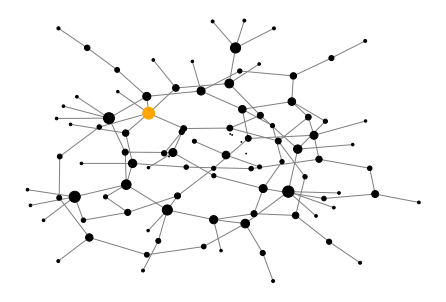

In [249]:
# Draw the network

nx.draw(G, 
        with_labels=False, 
        node_color=['black' if k != m else 'orange' for k in range(n)],
        edge_color='gray',
        node_size=(500*vals)**2,
        node_shape='o',
        pos=nx.kamada_kawai_layout(G))

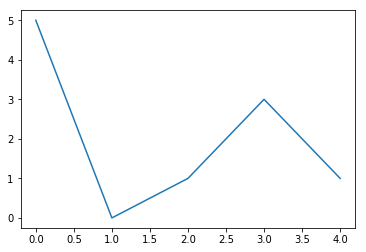

In [260]:
M = nx.laplacian_matrix(G)
M = np.matrix(M.toarray())
eigs = np.linalg.eigvals(M)
mags = [abs(e) for e in eigs]
y = plt.plot(mags)

# Comparing Probability Distributions

In [71]:
P

array([[1. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])